In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, explained_variance_score
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [6]:
df.drop('data', axis = 1, inplace= True)

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)

In [10]:
df = df.drop('date', axis = 1)

In [11]:
df = df.drop('zipcode', axis = 1)

In [12]:
x = df.drop('price', axis=1).values
y = df['price'].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [16]:
scaler = MinMaxScaler()

In [17]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

model.compile(optimizer='adam', loss = 'mse')

model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size= 128, epochs= 400)

Epoch 1/400
119/119 [==============================] - 2s 4ms/step - loss: 430490451968.0000 - val_loss: 418236661760.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428137283584.0000 - val_loss: 409890848768.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 394959618048.0000 - val_loss: 335093268480.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 257337720832.0000 - val_loss: 151956881408.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 116120805376.0000 - val_loss: 94663376896.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 99140608000.0000 - val_loss: 92700041216.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 97067999232.0000 - val_loss: 90860781568.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 94966972416.0000 - val_loss: 88955027456.0000
Epoch 9/400
119/119 [==

<Axes: >

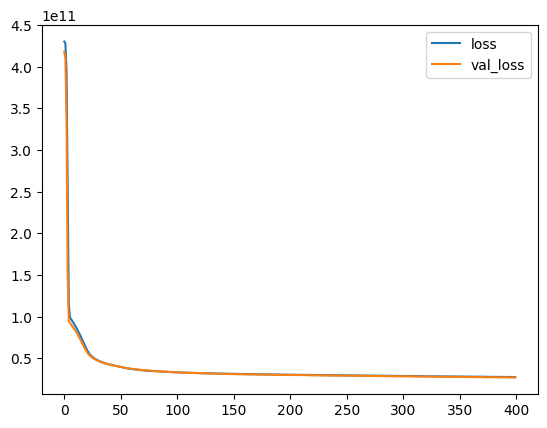

In [21]:
hist_df = pd.DataFrame(model.history.history)
hist_df.plot()

In [23]:
pred = model.predict(x_test)

203/203 [==============================] - 0s 2ms/step


In [27]:
mean_squared_error(y_test, pred)**0.5

164130.4330287641

In [26]:
mean_absolute_error(y_test, pred)

101229.07897135416

In [28]:
single_house = df.drop('price', axis = 1).iloc[0]

In [29]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [31]:
single_house = scaler.transform(single_house.values.reshape(-1,19))